# Librerías

In [267]:
# Librerias manipulación de datos
import calendar
import numpy as np
import pandas as pd
import requests
import sys
import os
import time

# Visualitation Modules 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from datetime import *

# Estadística
from scipy import stats
import inspect
from statsmodels.distributions.empirical_distribution import ECDF

# Sklearn models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

pd.options.display.float_format = '{:,.2f}'.format

# Carga de datos

In [268]:
# Carga de datos
data_csv = pd.read_csv('dataset_SCL.csv')

# Se crea una copia de los datos para trabajar sobre ellos
df = data_csv.copy(deep=True)
df1 = data_csv.copy(deep=True)

# Convertir tipos de datos de manera automática
df = df.convert_dtypes()
df1 = df1.convert_dtypes()

# Se realiza el cambio manual con las columnas que no cambiaron
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'])
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'])
df['TIPOVUELO'] = df['TIPOVUELO'].astype('category')

df1['Fecha-I'] = pd.to_datetime(df1['Fecha-I'])
df1['Fecha-O'] = pd.to_datetime(df1['Fecha-O'])
df1['TIPOVUELO'] = df1['TIPOVUELO'].astype('category')

# Se comprueba que el cambio se hizo correctamente
df.dtypes

Fecha-I      datetime64[ns]
Vlo-I                object
Ori-I                string
Des-I                string
Emp-I                string
Fecha-O      datetime64[ns]
Vlo-O                object
Ori-O                string
Des-O                string
Emp-O                string
DIA                   Int64
MES                   Int64
AÑO                   Int64
DIANOM               string
TIPOVUELO          category
OPERA                string
SIGLAORI             string
SIGLADES             string
dtype: object

In [238]:
# Ver tipo de variables y nulos
df.info()

# Existe un datos nulo presente en la columna Vlo-O

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  object        
 2   Ori-I      68206 non-null  string        
 3   Des-I      68206 non-null  string        
 4   Emp-I      68206 non-null  string        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68205 non-null  object        
 7   Ori-O      68206 non-null  string        
 8   Des-O      68206 non-null  string        
 9   Emp-O      68206 non-null  string        
 10  DIA        68206 non-null  Int64         
 11  MES        68206 non-null  Int64         
 12  AÑO        68206 non-null  Int64         
 13  DIANOM     68206 non-null  string        
 14  TIPOVUELO  68206 non-null  category      
 15  OPERA      68206 non-null  string        
 16  SIGLAORI   68206 non-null  string       

# Respuestas

### Creación de columna de Indicador de Atraso y otras
- Antes de responder se generar una columna auxiliar que permita hacer un analisis sobre los atrasos
- La siguiente columna sera creada para marcar aquellos vuelos que se atrasaron (1: Atraso, 0: No Atraso)
- Esta columna es necesaria para conocer como se distribuyen los datos (pregunta 1)

In [239]:
# Creación de columna Indicador de atraso
df.loc[df['Fecha-I'] < df['Fecha-O'], 'Ind_Atraso'] = 'Atrasado'
df.loc[df['Fecha-I'] >= df['Fecha-O'], 'Ind_Atraso'] = 'No Atrasado'

# Creación de columna dif_min
df['dif_min'] = (df['Fecha-O'] - df['Fecha-I']).astype('timedelta64[m]')

# Creación de columna Indicador de atraso
df.loc[df['dif_min'] <= 15, 'atraso_15'] = 0
df.loc[df['dif_min'] > 15, 'atraso_15'] = 1

df['Ind_Atraso'] = df['Ind_Atraso'].astype('category')
df['atraso_15'] = df['atraso_15'].astype('category')

### Gráficos de distribución de datos

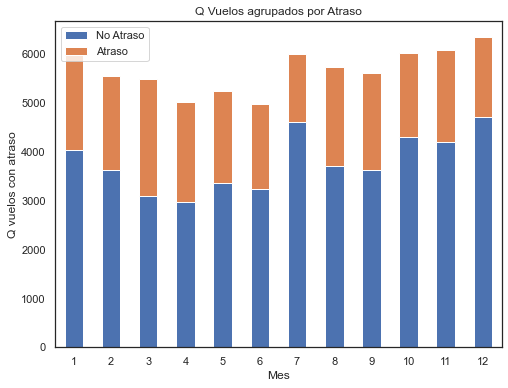

In [242]:
# Seteo de fondo
sns.set(style="white",rc = {'figure.figsize':(12,8)})

# Agrupación de campos a graficar
df_ind = df.groupby(['MES','Ind_Atraso'])['Fecha-I'].count().reset_index()

# Tabla pivote
df_pind = df_ind.pivot_table(values='Fecha-I',index='MES',columns='Ind_Atraso')

# Gráfico
ax = df_pind.plot(kind='bar', stacked=True, figsize=(8, 6), rot=0, xlabel='Mes', ylabel='Ind_Atraso')
ax.set_ylabel('Q vuelos con atraso')
ax.set_title('Q Vuelos agrupados por Atraso')
ax.legend(labels=['No Atraso','Atraso'])


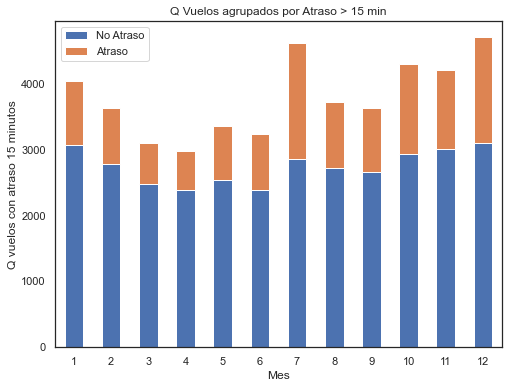

In [265]:
# Agrupación de campos a graficar
df_g = df_ind1.groupby(['MES','atraso_15'])['Fecha-I'].count().reset_index()

# Tabla pivote
df_pi = df_g.pivot_table(values='Fecha-I',index='MES',columns='atraso_15')

# Gráfico
ax = df_pi.plot(kind='bar', stacked=True, figsize=(8, 6), rot=0, xlabel='Mes', ylabel='atraso_15')
ax.set_ylabel('Q vuelos con atraso 15 minutos')
ax.set_title('Q Vuelos agrupados por Atraso > 15 min')
ax.legend(labels=['No Atraso','Atraso'])

In [253]:
df_pi['porcentaje'] = df_pi[1]/(df_pi[0] + df_pi[1])*100
df_pi

atraso_15,0.0,1.0,porcentaje
MES,,,
1,3064,978,24.20
2,2785,843,23.24
3,2470,631,20.35
4,2389,585,19.67
5,2533,827,24.61
6,2378,852,26.38
7,2856,1758,38.10
8,2721,996,26.80
9,2654,967,26.71


In [251]:
df_pi.mean()

atraso_15
0.0          2,741.08
1.0          1,051.17
porcentaje      27.04
dtype: float64

In [261]:
atr_15 = df_ind1[df_ind1['atraso_15']==1]
atr_15.mean()

C:\Users\Angello\AppData\Local\Temp/ipykernel_14008/649211887.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  atr_15.mean()
C:\Users\Angello\AppData\Local\Temp/ipykernel_14008/649211887.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  atr_15.mean()


DIA             15.67
MES              7.24
AÑO          2,017.00
Ind_Atraso       1.00
dif_min         38.48
atraso_15        1.00
dtype: float64

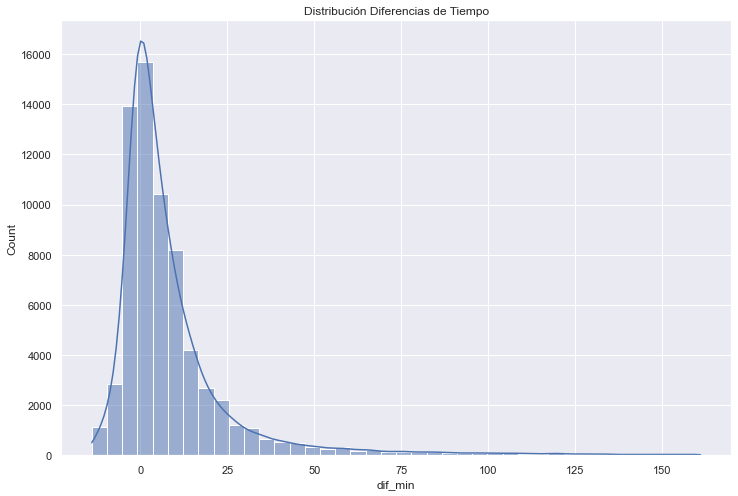

In [222]:
# Set nos permite dejar el fondo gris y cambiar el tamaño del gráfico
sns.set(style="darkgrid",rc = {'figure.figsize':(12,8)})

#Generamos el histograma de la distribución de diferencias de tiempo
sns.histplot(data=df, x="dif_min", kde=True, bins=40).set(title='Distribución Diferencias de Tiempo')
plt.show()

### Respuesta 1
¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

- Los datos son del año 2017 casi en su totalidad, hay 2 registros que corresponden al año 2018. Esto podrían ser imputados, pero para este analisis se ha decidido dejarlos.
- El indicador de Atraso marca cuando una vuelo se pasa de la fecha y hora programada, independiente del tiempo que se atrasara. Con este indicador es posible ver la cantidad mensuela de atrasos.
- El siguiente gráfico muestra los vuelos con mas de 15 minutos de atrasos distribuidos por meses, con esto podemos observar dos cosas: 
    1. Los meses con mayor cantidad de vuelos atrados en más de 15 minutos son Julio y Diciembre. 
    2. Los meses con mayor proporción de vuelos atrasado en mas de 15 minutos son Julio, Diciembre y Noviembre
- Los vuelos tienen un atraso de 15 minutos en promedio si se toman todos los vuelos. El promedio aumenta a 38.48 minutos cuando se filtran solo los atrasados mas de 15 minutos.
- La diferencia de tiempo se distribuye de manera muy parecida a una distribución log normal


### Respuestas 2

In [293]:
df1# Creación de columna dif_min

df1['daymonth'] = df1["Fecha-I"].dt.strftime("%d/%m")
df1['hourminute'] = df1["Fecha-I"].dt.strftime("%H:%M")

date1='15/12'
date2='03/03'
date3='15/07'
date4='31/07'
date5='11/09'
date6='30/09'

mask = (((df1['daymonth'] >= date1) & (df1['daymonth'] <= date2)) 
        | ((df1['daymonth'] >= date3) & (df1['daymonth'] <= date4)) 
        | ((df1['daymonth'] >= date5) & (df1['daymonth'] <= date6)))

#Creación de columnas temporada alta
df1.loc[mask, 'temporada_alta'] = 1
df1['temporada_alta'] = df1['temporada_alta'].fillna(0)


# Creación de columna dif_min
df1['dif_min'] = (df1['Fecha-O'] - df1['Fecha-I']).astype('timedelta64[m]')

# Creación de columna Indicador de atraso
df1.loc[df1['dif_min'] <= 15, 'atraso_15'] = 0
df1.loc[df1['dif_min'] > 15, 'atraso_15'] = 1

# Creación de columna Indicador de atraso
df1.loc[df1['dif_min'] <= 15, 'atraso_15'] = 0
df1.loc[df1['dif_min'] > 15, 'atraso_15'] = 1

# Creación de columna periodo dia
hora1='5:00'
hora2='11:59'
hora3='18:59'
hora4='4:59'

df1.loc[(df1['hourminute'] >= hora1) & (df1['hourminute'] <= hora2), 'periodo_dia'] = 'mañana'
df1.loc[(df1['hourminute'] > hora2) & (df1['hourminute'] <= hora3), 'periodo_dia'] = 'tarde'
df1.loc[(df1['hourminute'] > hora3) & (df1['hourminute'] <= hora4), 'periodo_dia'] = 'noche'

#Selección de las columnas
df_syn = df1[['temporada_alta','dif_min','atraso_15','periodo_dia']]

#Guardar datframe en CSV
df_syn.to_csv('synthetic_features.csv', index=False)